In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 124kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=ea253358e486348739985732cdc2bbdfaae0de1e2d85cede439e3a34dd2b7afd
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


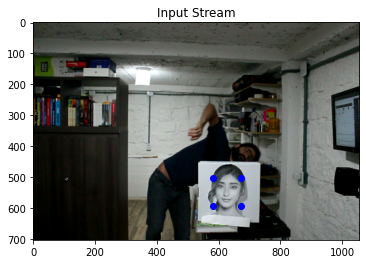

In [3]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

video_capture = cv2.VideoCapture("/content/001.mp4")
 
frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()
    if not ret:
        video_capture.release()
        break

    # 25 프레임마다 얼굴을 인식하도록 설정.
    frame_count += 1
    if frame_count % 25 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)

        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)